In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('BurstGPT_1.csv')

/tmp/ipykernel_4084530/2617977993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Token Range'] = (filtered_data['Request tokens'] // 10) * 10


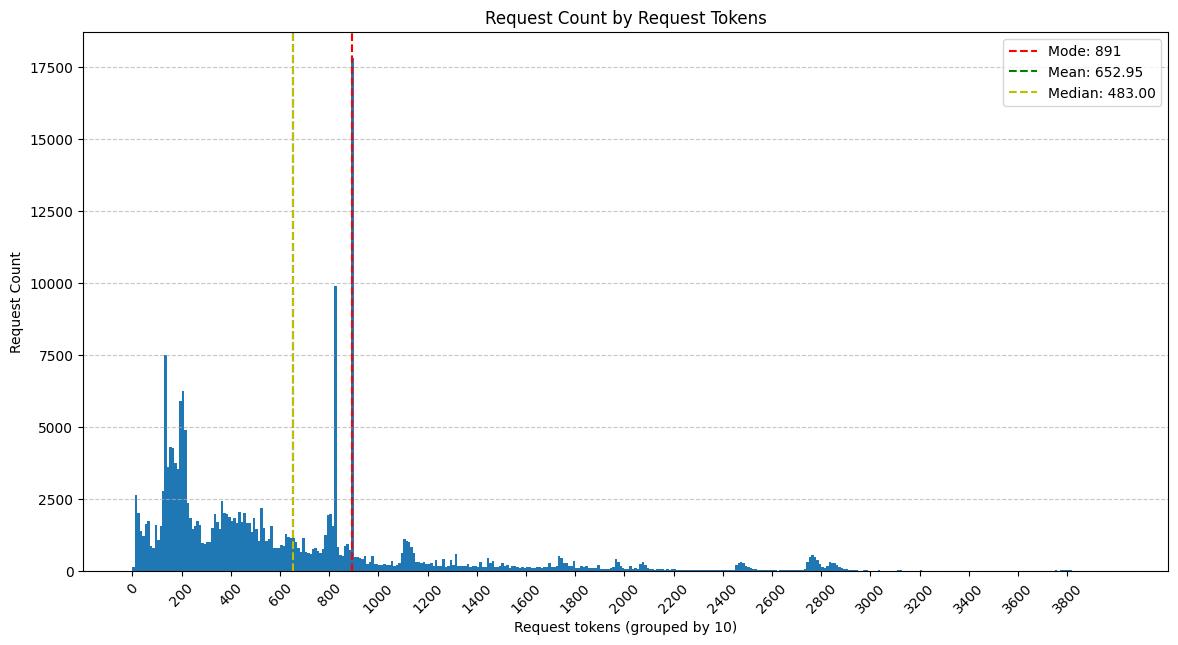

In [11]:
filtered_data = data[
    (data['Model'] != 'ChatGPT') & 
    (data['Request tokens'] <= 4000) &
    (data['Response tokens'] != 0)]

filtered_data['Token Range'] = (filtered_data['Request tokens'] // 10) * 10
token_counts = filtered_data['Token Range'].value_counts().sort_index()

tokens_mode = filtered_data['Request tokens'].mode()[0]
tokens_mean = filtered_data['Request tokens'].mean()
tokens_median = filtered_data['Request tokens'].median()

plt.figure(figsize=(14, 7))
plt.bar(token_counts.index, token_counts.values, width=10, align='edge')
# plt.hist(token_counts['num_input_tokens'], bins=np.logspace(0, 4, num=100), edgecolor='black', alpha=0.7)
# plt.xscale('log')
# plt.xticks([10**i for i in range(6)], [f'10^{i}' for i in range(6)])  # 设置显示的刻度和标签
# plt.xlim(1, 10**6)
plt.xlabel('Request tokens (grouped by 10)')
plt.ylabel('Request Count')
plt.title('Request Count by Request Tokens')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 4000, 200), rotation=45) # 自定义 x 轴的刻度，显示每 500 为一个刻度
plt.axvline(x=tokens_mode, color='r', linestyle='--', label=f'Mode: {tokens_mode}')
plt.axvline(x=tokens_mean, color='g', linestyle='--', label=f'Mean: {tokens_mean:.2f}')
plt.axvline(x=tokens_mean, color='y', linestyle='--', label=f'Median: {tokens_median:.2f}')
plt.legend()
plt.show()

/tmp/ipykernel_4084530/1382656517.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Token Range'] = (filtered_data['Response tokens'] // 10) * 10


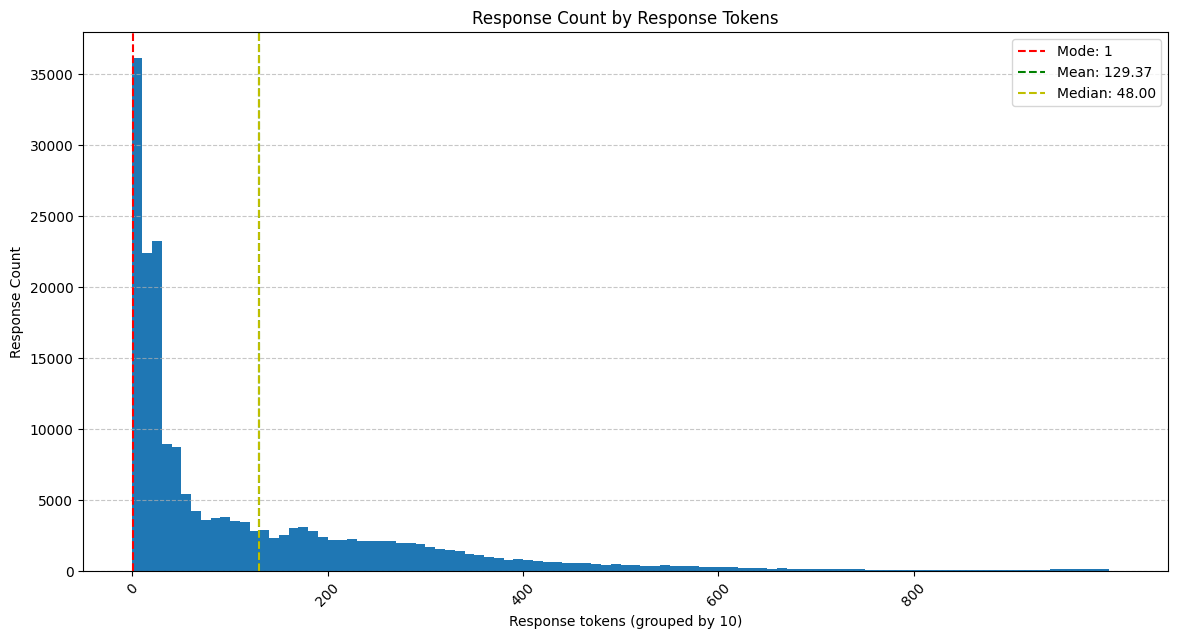

In [16]:
filtered_data = data[
    (data['Model'] != 'ChatGPT') & 
    (data['Request tokens'] <= 4000) &
    (data['Response tokens'] != 0) &
    (data['Response tokens'] <= 1000)]

filtered_data['Token Range'] = (filtered_data['Response tokens'] // 10) * 10
token_counts = filtered_data['Token Range'].value_counts().sort_index()

tokens_mode = filtered_data['Response tokens'].mode()[0]
tokens_mean = filtered_data['Response tokens'].mean()
tokens_median = filtered_data['Response tokens'].median()

plt.figure(figsize=(14, 7))
plt.bar(token_counts.index, token_counts.values, width=10, align='edge')
plt.xlabel('Response tokens (grouped by 10)')
plt.ylabel('Response Count')
plt.title('Response Count by Response Tokens')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 1000, 200), rotation=45) # 自定义 x 轴的刻度，显示每 500 为一个刻度
plt.axvline(x=tokens_mode, color='r', linestyle='--', label=f'Mode: {tokens_mode}')
plt.axvline(x=tokens_mean, color='g', linestyle='--', label=f'Mean: {tokens_mean:.2f}')
plt.axvline(x=tokens_mean, color='y', linestyle='--', label=f'Median: {tokens_median:.2f}')
plt.legend()
plt.show()